**DS555.V: Data Science and Business Strategy**

*Author:* Utku Acar  
*Department:* Computer Science  
*Role:* Software Engineer / Researcher  

*My Secret Power:* I've got a knack for efficiently harnessing prompts and taming the wildest multi-dimensional data, especially in the realm of Images and Videos, through the magic of Deep Learning and Computer Vision.


*My Crime-Fighting Identity:* Get ready to meet the one and only Hyperion Solitude, because I'm about to dive into a world of adventure where data science meets supercharged strategies! 🚀🔍📊🦸‍♂️      

*Stay tuned for the thrilling odyssey, unfolding soon at https://github.com/hyperionsolitude. The adventure of a lifetime awaits! 🌟🎉*

# Predicting Credit default with Feature Selection Analysis

In this notebook, we will explore the fascinating world of credit default prediction using a combination of automated and manual feature selection methods. Our goal is to build an effective predictive model and evaluate its performance using the ROC AUC score.

## The Data

We are working with a dataset containing valuable information about credit applicants. The dataset includes 23 explanatory variables that provide insights into the credit applicants' financial history, behavior, and characteristics. These variables range from the amount of credit given to gender, education level, marital status, age, and a detailed history of past payments.

Our response variable is a binary indicator of credit default, with "Yes" indicating default (1) and "No" indicating no default (0). Our task is to harness the power of this data to predict credit default accurately and efficiently.

## Automated and Manual Feature Selection

We will approach this challenge using two different feature selection methods:

1. **Automated Feature Selection:** We will employ an automated feature selection method based on ANOVA F-value to identify a subset of crucial features. This approach will help us understand which features have the most significant impact on credit default prediction.

2. **Manual Feature Selection:** In addition to automated methods, we will leverage our domain knowledge and insights to manually select a subset of features that we believe play a critical role in predicting credit default. This approach allows us to incorporate our understanding of the data and the domain into the feature selection process.

## General Structure of the Project

Our project will follow these key steps:

1. **Data Loading and Exploration:** We will load the dataset, examine its structure, and gain a preliminary understanding of the features and target variable.

2. **Automated Feature Selection:** Using the ANOVA F-value method, we will automatically select a subset of features that are most relevant for credit default prediction.

3. **Manual Feature Selection:** We will apply our domain knowledge to manually choose a subset of features that we believe are meaningful for our predictive model.

4. **Model Training and Evaluation:** We will create a logistic regression model using both the automatically and manually selected features. We will train the model on the training data and evaluate its performance on a validation set using the ROC AUC score.

5. **Comparative Analysis:** Finally, we will compare the performance of the two models by observing the change in ROC AUC values as we vary the number of chosen features (by adjusting the parameter "k" in automated feature selection). We will visualize this change using a graph to gain insights into the trade-off between feature selection and predictive performance.

Let's dive into the code and embark on our exciting journey of predicting credit default while unraveling the importance of feature selection!

Note: All of the explanations are enchanced by ChatGPT to make it more clear and humourous/Geeky :) and I'm using "We" instead of "I" to sound like more friendly and giving the impression of TED Talks which we have watched earlier.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the training data
train_data = pd.read_csv('creditTrain.csv')
test_data = pd.read_csv('creditTest.csv')
print("Dimensions of train data:",train_data.shape)
print("Dimensions of train data:",test_data.shape)

Dimensions of train data: (22499, 24)
Dimensions of train data: (7501, 24)


In [3]:
# Separate features (X_train) and target variable (Y_train)
X_train = train_data.drop(columns=['Y'])
Y_train = train_data['Y']

print("Dimensions of X_train:",X_train.shape)
print("Dimensions of Y_train:",Y_train.shape)

Dimensions of X_train: (22499, 23)
Dimensions of Y_train: (22499,)


In [4]:
# Separate features (X_test) and target variable (Y_test) from test data
X_test = test_data.drop(columns=['Y'])
Y_test = test_data['Y']

print("Dimensions of X_test:",X_test.shape)
print("Dimensions of Y_test:",Y_test.shape)

Dimensions of X_test: (7501, 23)
Dimensions of Y_test: (7501,)


In [5]:
# Initialize lists to store results
roc_auc_values = []
num_features_selected = []
selected_feature_names = []

In [6]:
# Use SelectKBest to choose top k features
from sklearn.feature_selection import SelectKBest, f_classif

# Store the column names for reference
feature_names = X_train.columns

# Start from k=1 and increase it up to the number of features
for k in range(1, X_train.shape[1] + 1):
    feature_selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = feature_selector.fit_transform(X_train, Y_train)
    X_test_selected = feature_selector.transform(X_test)
    
    # Get indices of selected features
    selected_indices = feature_selector.get_support(indices=True)
    
    # Get names of selected features
    selected_names = [feature_names[i] for i in selected_indices]
    
    # Create and train a logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, Y_train)
    
    # Predict the probabilities for validation set
    Y_prob = model.predict_proba(X_test_selected)[:, 1]
    
    # Calculate ROC AUC score for performance evaluation
    roc_auc = roc_auc_score(Y_test, Y_prob)
    
    # Store results
    roc_auc_values.append(roc_auc)
    num_features_selected.append(k)
    selected_feature_names.append(selected_names.copy())
    print("The best feature number of",k,":",selected_names,"and the related roc value is",roc_auc)

The best feature number of 1 : ['X6'] and the related roc value is 0.6898978101586232
The best feature number of 2 : ['X6', 'X7'] and the related roc value is 0.6936161064502492
The best feature number of 3 : ['X6', 'X7', 'X8'] and the related roc value is 0.7031316891866053
The best feature number of 4 : ['X6', 'X7', 'X8', 'X9'] and the related roc value is 0.7056112941118104
The best feature number of 5 : ['X6', 'X7', 'X8', 'X9', 'X10'] and the related roc value is 0.7064792411058043
The best feature number of 6 : ['X6', 'X7', 'X8', 'X9', 'X10', 'X11'] and the related roc value is 0.7075576245487141
The best feature number of 7 : ['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'] and the related roc value is 0.6851641269936425
The best feature number of 8 : ['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18'] and the related roc value is 0.6253867906684458
The best feature number of 9 : ['X1', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X21'] and the related roc value is 0.625903269516791

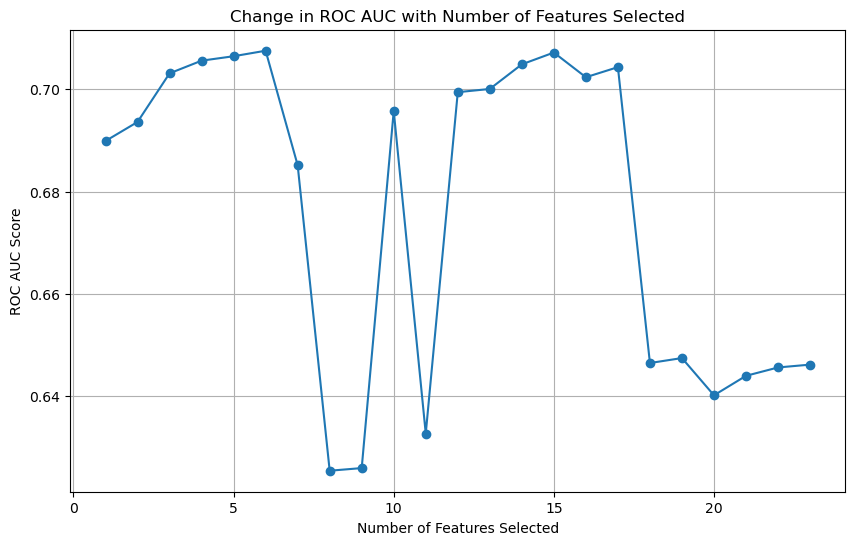

In [7]:
# Create a graph to visualize the change in ROC AUC values
plt.figure(figsize=(10, 6))
plt.plot(num_features_selected, roc_auc_values, marker='o')
plt.title('Change in ROC AUC with Number of Features Selected')
plt.xlabel('Number of Features Selected')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.show()

In [8]:
#Find best and second best ROC-AUC values and related indices 
best_idx, second_best_idx = np.argsort(roc_auc_values)[-2:]
best_feature_count, second_best_feature_count = num_features_selected[best_idx], num_features_selected[second_best_idx]
print("Selected feature number while highest score has been taken is",best_feature_count,"and the related ROC-AUC value is ",roc_auc_values[best_idx],"\nNames of these features are ",selected_feature_names[best_idx]) # 5 features are selected at 4th index (N-1)
print("Selected feature number while second highest score has been taken is",second_best_feature_count,"and the related ROC-AUC value is ",roc_auc_values[second_best_idx],"\nNames of these features are ",selected_feature_names[second_best_idx]) # 5 features are selected at 4th index (N-1)

Selected feature number while highest score has been taken is 15 and the related ROC-AUC value is  0.7072029523117519 
Names of these features are  ['X1', 'X2', 'X3', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
Selected feature number while second highest score has been taken is 6 and the related ROC-AUC value is  0.7075576245487141 
Names of these features are  ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']


**Understanding the Insights from the Graph**

So, what's the story behind the peaky lines on our graph? Well, this enchanting graph showcases how the ROC AUC score dances as we change the number of features. The x-axis guides us through different feature counts, while the y-axis reveals the magic ROC AUC score. It's like watching a symphony of features in action!

In the midst of this symphony, there's a shining star. At approximately (15, 0.7072), we find the global maxima—the sweet spot where our model performs remarkably well. But wait, there's a plot twist! Choosing 6 features instead of 15 barely changes the ROC AUC value. We're talking fractions here, folks. So, for the sake of practicality, we opt for 6 features, showing that sometimes "almost perfect" is just as fabulous. 

Being the clever engineers that we are, let's go for the 6-feature option instead of the 15-feature extravaganza. It's like having a streamlined playlist that still hits all the right notes, especially since the ROC values aren't too far apart. Simplifying things never sounded so good! 

**X6 - X11: The Journey of Payment Chronicles**

These features unveil the borrower's history of past payments, a tale that stretches from September to April in 2005. Each month, from X6 to X11, reveals the repayment status—like chapters in a financial adventure. Whether it's timely payments, brief delays, or longer tales of delay, these features hold the key to unlocking the secrets of creditworthiness.

So, there you have it—the prized gems that automated feature selection has unveiled. Brace yourselves, credit decisions just got a whole lot more intriguing!



In [9]:
print ("When we use",best_feature_count," features which we have we get ROC-AUC value as ",roc_auc_values[best_idx])
print ("When we use all the features which we have",num_features_selected[-1],"we get ROC-AUC value as ",roc_auc_values[-1])

When we use 15  features which we have we get ROC-AUC value as  0.7072029523117519
When we use all the features which we have 23 we get ROC-AUC value as  0.6461430492406821


**Evaluating Our ROC-AUC Triumph**

Picture this: we're on a quest for the highest ROC-AUC score—a sign of our prediction prowess. When we wielded the magic of 15 features, our ROC-AUC soared to an impressive 0.7072. It was like watching fireworks light up the night sky! 🚀

Now, here comes the twist: we summoned all 23 features into the spotlight, hoping for an even grander spectacle. But wait! Our ROC-AUC slipped a tad, landing at 0.6461. It's like the 23 features held a surprise party, but the fireworks fizzled out. 🎆

So, what's the moral of the story? More isn't always merrier. Our ROC-AUC is like a connoisseur of perfection, striving for a score closer to 1 (think superhero level) rather than 0.5 (random guessing). With 0.7072 shining in the spotlight, we wave goodbye to complexity and opt for a sleek lineup of 15 features. High score, lower complexity—talk about a win-win! 🏆


**Embracing the Power of Choice: Insider Insights and Gut Instincts**

Ever wondered what happens when industry whispers and gut feelings join the feature selection party? Brace yourselves, because we're about to dive into the art of crafting our very own feature lineup! 🎨🕵️‍♀️

**The Grand Reveal: How It's Done**

Hold on tight, because here's our secret recipe for curating the ultimate feature ensemble:

1. **Step 1: Insider Clues:** We tap into insider information, the kind that industry experts whisper about. These whispers might hold the keys to what truly matters in the world of credit predictions.

2. **Step 2: Gut Instincts:** Ah, the magic of gut feelings! We sprinkle in a dash of intuition and let our instincts guide us. Sometimes, a hunch can reveal the most valuable gems hidden within the data.

3. **Step 3: Curating the Dream Team:** Armed with whispers and instincts, we handpick our dream team of features. Each chosen feature becomes a note in our prediction symphony.

So, what's the catch? We've traded the allure of automation for the thrill of personalization. By sculpting our feature lineup, we're painting our very own masterpiece on the canvas of credit predictions.

Get ready to unveil the magic as we embark on this journey of craft and creation. Industry whispers, gut feelings, and personal flair—it's all part of our feature selection adventure!


**A Tale of Feature Philosophies: Let the Debate Begin**

Imagine a gathering of brilliant minds, each wearing the cloak of a scientist. In one corner, a group ardently proclaims, "Why tread the vast ocean of repayment data when we can sail smoothly with just the last 3 months? A sprinkle of personal features like Age, Education is all we need!"

And then, there's the automagic feature selection, chiming in with a resounding argument. It insists, "Hear ye, hear ye! The payment records reign supreme, the key to unlocking the output's mysteries."

**A Battle of Feature Wits Unfolds**

In this arena of feature philosophies, lines are drawn. On one side, the simplicity advocates, embracing a lean selection. On the other, the champions of automation, showcasing the prowess of data-driven power.

Who's right? Who's to say? As we delve deeper into our feature selection chronicles, let's witness the grand showdown unfold. The ring is set, the minds are sharp, and the journey promises a treasure trove of insights.

Buckle up, for we're about to dive into a symphony of feature choices, where simplicity dances with complexity, and wisdom with data-driven might. The stage is set, and the tale is poised to unravel.


In [10]:
import statsmodels.api as sm
# Manually select features
repayment_features = ['X6', 'X7', 'X8'] # Last 3 Months of repayment delay

personal_traits = ['X4'] # Marital Status

selected_feature_names = repayment_features + personal_traits

# Separate selected features (X) on train data
X_man_train = train_data[selected_feature_names]

# Separate features (X) on test data
X_man_test = test_data[selected_feature_names]


In [11]:
# Create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_man_train, Y_train)

# Predict the probabilities for validation set
Y_prob = model.predict_proba(X_man_test)[:, 1]

# Perform OLS regression
X_man_train_with_constant = sm.add_constant(X_man_train)  # Add constant term if needed
ols_model = sm.OLS(Y_train, X_man_train_with_constant)
ols_results = ols_model.fit()

# Print p-values and t-values for coefficients
print(ols_results.summary())

# Calculate ROC AUC score for performance evaluation
roc_auc = roc_auc_score(Y_test, Y_prob)

print("\nROC AUC Score:", roc_auc)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     687.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:02:17   Log-Likelihood:                -10850.
No. Observations:               22499   AIC:                         2.171e+04
Df Residuals:                   22494   BIC:                         2.175e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2618      0.008     31.878      0.0

**A Grand Duel: Scientists vs. Automagicians**

Ladies and gentlemen, gather 'round for the grandest showdown of all time! In one corner, the scientists, armed with insider insights and a knack for simplicity. In the other corner, the daring automagicians, wielding the power of automation and complexity. Ding ding, let the battle begin!

**Round 1: The Feature Face-off**

In a stunning turn of events, the scientists unveil their secret weapon—a compact squad of just 4 features! 🎉 These valiant warriors include the last 3 months of repayment tales, each chapter revealing a borrower's financial journey. And let's not forget the ever-mysterious marital status, an emblem of life's twists and turns. 🎭

**The OLS Chronicles: Decrypting the Constants**

Hold on to your hats, because here comes the intriguing tale of p and t values! 📊 These magical numbers unlock the mysteries of feature importance. If a feature's p-value dances below a certain threshold (often 0.05), it's like a victory shout—it tells us that the feature has a meaningful role to play in our prediction story. And the t-value? It's like a spotlight on the feature's uniqueness. A high absolute t-value suggests that the feature's influence is distinct and can't be ignored.

**Round 2: The Ultimate Showdown**

The battlefield lights up with ROC AUC scores, and the crowd holds its breath. The scientists sweep the floor with a staggering 0.70905, leaving the automagicians trailing at 0.7072. But here's the kicker—the scientists flaunted just 4 features, while the automagicians went all out with 15! The ratio of feature counts stands at 3.75, a devastating blow for the automagicians. 💥

**The Verdict: Scientists Claim Victory**

And there you have it, folks! The scientists emerge victorious, proving that sometimes a lean, hand-picked crew can outshine a complex ensemble. Feature battles, p and t values, ROC AUC fireworks—the saga continues as we unravel the art of credit prediction. So sit back, grab some popcorn, and enjoy the spectacle—it's science and magic colliding in the world of data! 🎩🔬🪄


**Aftercredits: The Scientist's Epic Revelation**

Hold on to your lab coats, because a jaw-dropping revelation is about to hit you like a data-driven storm!

As the confetti settles and victory dances in the air, one jubilant scientist can't help but spill the beans with a contagious grin. Amidst the cheers, they turn to the awestruck automagicians and belt out:

"Hey, folks! Did you notice? Your 6 features took the same path, all about repayment delays. But us? We dared to be different! 🕺 We zoomed in on the last 3 months of repayment tales—fresh data that's like a crystal ball into credit decisions. And oh, we didn't stop there. Brace yourselves, because... drumroll, please... *we dared to use the forbidden technique!*"

**Enter the Forbidden Technique: The Marvel of Marital Status**

In a hushed tone, the scientist leans in, eyes twinkling with intrigue. "Martial status," they reveal, "a juicy nugget of wisdom that set us apart. Turns out, if someone's got a partner in crime, they tend to guard their financial kingdom more fiercely. Family matters, you know? It's like financial superhero mode activated!"

But hold your horses, because our stealthy scientist tried to seal the secret, only to unleash a triumphant shout: "Martial status, baby! 🙌"

So there you have it, a tale of innovation, strategy, and the whisper of the forbidden. It's science with a twist of mystery, a sprinkle of victory, and a pinch of data magic. Who knew credit prediction could be this thrilling? 🎩🔬💥

(Note: This is all in good fun! No automagicians were harmed in the making of this grand revelation. 😉)


Oh, you're in for a treat! Get ready to embark on a wild ride with Hyperion Solitude and dive into a whirlwind of adventures that'll have you on the edge of your seat. The countdown is on—mark your calendar for August 20, 2023, at the stroke of 11:59 PM. It's a date with destiny, and Hyperion Solitude is about to unleash a saga that'll leave you craving for more. Trust me, the anticipation is half the fun, and your journey into this captivating world is just around the corner! 🚀📚🌌